In [1]:
import os 
from dotenv import load_dotenv
load_dotenv()

os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')

In [2]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter


USER_AGENT environment variable not set, consider setting it to identify your requests.


In [3]:
urls = [
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/"
]
docs = [WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\nWorkflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing sear

In [4]:
from langchain.embeddings import HuggingFaceEmbeddings

embedding = HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')

docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000, chunk_overlap = 200
)

doc_split = text_splitter.split_documents(docs_list)
vectorstore = FAISS.from_documents(
    documents=doc_split,
    embedding= embedding
)

retreiver = vectorstore.as_retriever()

C:\Users\vibhav.ahuja\AppData\Local\Temp\ipykernel_12452\3274492011.py:3: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding = HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')
d:\Ai Agents\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
text = ['hello']
emb = embedding.embed_documents(text)
print("Number of embeddings:", len(emb))
print("Embedding length:", len(emb[0]))
print("First 5 dimensions of first embedding:", emb[0][:5])

Number of embeddings: 1
Embedding length: 384
First 5 dimensions of first embedding: [-0.06277173012495041, 0.0549587644636631, 0.052164845168590546, 0.08579001575708389, -0.0827489048242569]


In [6]:
retreiver.invoke('what is langgraph')

[Document(id='0db6597a-cb1b-43db-be18-8f8540a72e75', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Here is a simple way to visualize these differences:\n\nWhen building agents and workflows, LangGraph offers a number of benefits including persistence, streaming, and support for debugging as well as deployment.\nSet up¶\nYou can use any chat model that supports structured outputs and tool calling. Below, we show the process of installing the packages, setting API keys, and testing structured outputs / tool calling for Anthropic.\n\nInstall dependencies\npip install langchain_core langchain-anthropic langgraph \n\n\nInitialize an LLM\nAPI Reference: ChatAnthropic\nimport os\nimport getpass\n\nfrom langchain_anthropic import ChatAnthropic\n\ndef _set_env(var: str):\n    if not os.environ.get(var):\n        o

In [7]:
from langchain.tools.retriever import create_retriever_tool
retreiver_tool = create_retriever_tool(
    retreiver,
    'retriever_vector_db_blog',
    'Search and run information about Langgrapg'
)

In [8]:
retreiver_tool

Tool(name='retriever_vector_db_blog', description='Search and run information about Langgrapg', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x0000029158D1B100>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000029154788E30>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x0000029158D1B4C0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000029154788E30>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_co

In [9]:
langchain_urls=[
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials/qa_chat_history/"
]

docs=[WebBaseLoader(url).load() for url in langchain_urls]
docs

[[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='\n\n\n\n\nTutorials | 🦜️🔗 LangChain\n\n\n\n\n\n\nSkip to main contentOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!IntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL dataS

In [10]:
from sentence_transformers import SentenceTransformer
from langchain.embeddings import HuggingFaceEmbeddings

embedding = HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')

docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000, chunk_overlap = 200
)

doc_split = text_splitter.split_documents(docs_list)
vectorstorelangchain = FAISS.from_documents(
    documents=doc_split,
    embedding= embedding
)

retreiverlangchain = vectorstorelangchain.as_retriever()

In [11]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool_langchain=create_retriever_tool(
    retreiverlangchain,
    "retriever_vector_langchain_blog",
    "Search and run information about Langchain"
)

In [12]:
tools = [retreiver_tool, retriever_tool_langchain]

In [13]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]


In [14]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-qwq-32b")
llm.invoke("Hi")

AIMessage(content='\n<think>\nOkay, the user said "Hi". I should respond in a friendly way. Let me think of a simple greeting. Maybe "Hello! How can I assist you today?" That sounds good. It\'s welcoming and opens the door for them to ask for help. I should make sure to keep it concise and not add any extra information unless needed. Yeah, that should work.\n</think>\n\nHello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 11, 'total_tokens': 99, 'completion_time': 0.202300183, 'prompt_time': 0.002716805, 'queue_time': 0.046117684, 'total_time': 0.205016988}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_ea798e78f0', 'finish_reason': 'stop', 'logprobs': None}, id='run--bc4782fc-dfab-4f46-b5a1-421dcf051f54-0', usage_metadata={'input_tokens': 11, 'output_tokens': 88, 'total_tokens': 99})

In [15]:
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    messages = state["messages"]
    model = ChatGroq(model="qwen-qwq-32b")
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}

In [16]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict

from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

from pydantic import BaseModel, Field

In [17]:
### Edges
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    # Data model
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")
        

    # LLM
    model = ChatGroq(model="qwen-qwq-32b")

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)
    #print(grade.binary_score)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score
    print(score)

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        #print(score)
        return "rewrite"

In [18]:
def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = hub.pull("rlm/rag-prompt")

    # LLM
    llm = ChatGroq(model="qwen-qwq-32b")

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}


In [19]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatGroq(model="qwen-qwq-32b")
    response = model.invoke(msg)
    return {"messages": [response]}

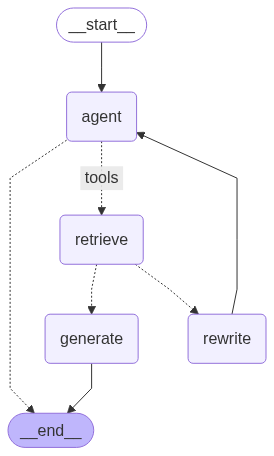

In [20]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([retreiver_tool,retriever_tool_langchain])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [21]:
graph.invoke({"messages":"What is Langgraph?"})

---CALL AGENT---
---CHECK RELEVANCE---
yes
---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='What is Langgraph?', additional_kwargs={}, response_metadata={}, id='2678881b-d7d0-49f3-8ac0-36da4c539156'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking, "What is Langgraph?" I need to figure out how to answer this. Let me see what tools I have available.\n\nLooking at the tools provided, there\'s retriever_vector_db_blog and retriever_vector_langchain_blog. The first one might be for general blog posts, and the second specifically related to LangChain. Since the question is about Langgraph, which might be related to LangChain, maybe the LangChain retriever is the right choice. But I\'m not entirely sure. Wait, maybe Langgraph is a tool or concept discussed in the LangChain blog. \n\nAlternatively, maybe the general blog retriever could have information. But to be safe, perhaps I should check both. However, since I can only call one function, I need to decide which is more likely. The name "Langgraph" sou

In [22]:
graph.invoke({"messages":"What is Langchain?"})

---CALL AGENT---
---CHECK RELEVANCE---
yes
---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='What is Langchain?', additional_kwargs={}, response_metadata={}, id='a4cdbeb4-aa35-4d0f-85b5-44ab012ca730'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking, "What is Langchain?" I need to figure out which tool to use here. Let me check the available functions. There are two: retriever_vector_db_blog and retriever_vector_langchain_blog. The second one has "langchain" in its name, so that\'s probably the right choice. The first one might be for a general blog, while the second is specifically related to Langchain. Since the user\'s query is directly about Langchain, using retriever_vector_langchain_blog makes sense. The parameter required is a query string, which in this case would be the same as the user\'s question. So I\'ll call that function with the query "What is Langchain?" to get the relevant information from the vector database.\n', 'tool_calls': [{'id': 'wvp3dwffs', 'function': {'arguments': '{"query

In [ ]:
from pprint import pprint
import pprint

result = graph.invoke({"messages": "explain me about openai tools"})

pprint.pprint(result)

---CALL AGENT---
---CHECK RELEVANCE---
no
---DECISION: DOCS NOT RELEVANT---
---TRANSFORM QUERY---
---CALL AGENT---
{'messages': [HumanMessage(content='explain me about openai tools', additional_kwargs={}, response_metadata={}, id='12f80e19-4af5-472e-9b21-44c2851480a5'),
              AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking to explain OpenAI tools. Let me see which functions I have available. The tools provided are retriever_vector_db_blog and retriever_vector_langchain_blog. Both take a query parameter.\n\nHmm, I need to figure out which one to use. The user\'s query is about OpenAI tools, which is a general topic. The first function, retriever_vector_db_blog, might be more general, while the second one, retriever_vector_langchain_blog, might be specific to LangChain. Since OpenAI tools are a broader topic, maybe the first function is better. But wait, maybe LangChain integrates OpenAI tools, so perhaps the second could also have relevant

In [38]:
result = graph.invoke({"messages": "explain me about langgraph studio"})

---CALL AGENT---
---CHECK RELEVANCE---
no
---DECISION: DOCS NOT RELEVANT---
---TRANSFORM QUERY---
---CALL AGENT---


In [39]:
from pprint import pprint

# Assuming `result` contains the agent's response messages
for message in result['messages']:
    print(f"\n--- {type(message).__name__} ---")
    if hasattr(message, 'content'):
        print("Content:")
        pprint(message.content)
    if hasattr(message, 'additional_kwargs') and message.additional_kwargs:
        print("\nAdditional kwargs:")
        pprint(message.additional_kwargs)
    if hasattr(message, 'response_metadata') and message.response_metadata:
        print("\nResponse metadata:")
        pprint(message.response_metadata)
    print("-" * 40)


--- HumanMessage ---
Content:
'explain me about langgraph studio'
----------------------------------------

--- AIMessage ---
Content:
''

Additional kwargs:
{'reasoning_content': 'Okay, the user is asking to explain LangGraph Studio. '
                      'Let me think about which tool to use here. The '
                      'available functions are retriever_vector_db_blog and '
                      'retriever_vector_langchain_blog. The user mentioned '
                      '"langgraph studio", which might be related to '
                      'LangChain, so the second function, '
                      'retriever_vector_langchain_blog, seems more '
                      'appropriate. I should check the parameters; both '
                      'functions require a query. The query should be the '
                      "user's question. I'll format the tool call with the "
                      'function name and the query as "What is LangGraph '
                      'Studio?" t

In [40]:
def print_messages_readably(messages):
    for msg in messages:
        print(f"\n[{type(msg).__name__}]")
        
        # Print content with basic formatting
        if msg.content:
            content = msg.content.strip()
            print(f"Content:\n{content}\n")
        
        # Print tool calls if present
        if hasattr(msg, 'tool_calls') and msg.tool_calls:
            print("Tool Calls:")
            for call in msg.tool_calls:
                print(f"- {call['name']}: {call.get('args', {})}")
        
        # Print reasoning if present
        if hasattr(msg, 'additional_kwargs') and msg.additional_kwargs.get('reasoning_content'):
            print(f"\nReasoning:\n{msg.additional_kwargs['reasoning_content']}")

# Usage
print_messages_readably(result['messages'])


[HumanMessage]
Content:
explain me about langgraph studio


[AIMessage]
Tool Calls:
- retriever_vector_langchain_blog: {'query': 'What is LangGraph Studio?'}

Reasoning:
Okay, the user is asking to explain LangGraph Studio. Let me think about which tool to use here. The available functions are retriever_vector_db_blog and retriever_vector_langchain_blog. The user mentioned "langgraph studio", which might be related to LangChain, so the second function, retriever_vector_langchain_blog, seems more appropriate. I should check the parameters; both functions require a query. The query should be the user's question. I'll format the tool call with the function name and the query as "What is LangGraph Studio?" to get the relevant information from the vector database.


[ToolMessage]
Content:
We build them below. Note that we leverage another pre-built LangGraph component, ToolNode, that executes the tool and adds the result as a ToolMessage to the state.

In production, the Q&A application wi